In [340]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

Loads

In [609]:
df=pd.read_csv('Total Load - Day Ahead _ Actual_201901010000-202001010000.csv')
df['ts']=pd.to_datetime([i[0] for i in df['Time (CET)'].str.split('-')],dayfirst=True)
df=df.set_index('ts',drop=False).sort_index()
load='Average UK Load in GW\n 01-01-2019 to 05-27-2019'
df[load]=df['Actual Total Load [MW] - United Kingdom (UK)'].replace('-',np.nan).astype(float)/1000
df[load]=df[load].rolling(3).mean()
df['day']=df['ts'].dt.weekday_name
time='Time of day'
df[time]=df['ts'].dt.time
df['Month']=df['ts'].dt.month
df['date']=df['ts'].dt.date.astype(str)

In [610]:
label='Day type'
labels=[]
for i in df[['date','day']].values:
    if i[1] in ['Saturday','Sunday']:
        d='Weekend'
    else:
        d='Weekday'
    if i[0] in ['2019-01-01','2019-04-19','2019-05-06','2019-05-27']:
        d='Bank Holiday'
        #d=i[0]
    labels.append(d)
df[label]=labels

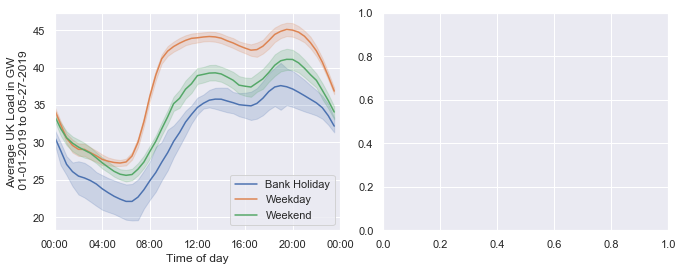

In [611]:
# Plot the responses for different events and regions
fig,axes=plt.subplots(1,2,figsize=(11,4))
plt.subplots_adjust(wspace=0.15)
ax=axes[0]
sns.lineplot(x=time, y=load,
             hue=label, 
             #style="day",
             data=df,
             ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.set_xlim(0,24*60*60)
ax.set_xticks(range(0,24*60*60+1,4*60*60))

In [612]:
1-df.groupby('Day type').mean()[[load]].loc['Weekend']/df.groupby('Day type').mean()[[load]].loc['Weekday']

Average UK Load in GW\n 01-01-2019 to 05-27-2019    0.099936
dtype: float64

In [613]:
1-df.groupby('Day type').mean()[[load]].loc['Bank Holiday']/df.groupby('Day type').mean()[[load]].loc['Weekday']

Average UK Load in GW\n 01-01-2019 to 05-27-2019    0.190355
dtype: float64

In [614]:
label='Day type'
labels=[]
pretty={'2019-01-01':'Other','2019-04-19':'Other',
        '2019-05-06':'Early May BH 05-06','2019-05-27':'Spring BH 05-27',
       '1e':'January Weekday','5e':'May Weekday',
        '1k':'January Weekend','5k':'May Weekend'}
for i in df[['date','day','Month']].values:
    if i[1] in ['Saturday','Sunday']:
        if i[2] in [1,5]:
            d=pretty[str(i[2])+'k']
        else:
            d='Other'
    else:
        if i[2] in [1,5]:
            #d=pretty[str(i[2])+'e']
            d='Other'
        else:
            d='Other'
    if i[0] in ['2019-01-01','2019-04-19','2019-05-06','2019-05-27']:
        d=pretty[i[0]]
        #d=i[0]
    labels.append(d)
df[label]=labels

In [615]:
# Plot the responses for different events and regions
ax=axes[1]
sns.lineplot(x=time, y=load,
             hue=label, 
             #style="day",
             data=df[df[label]!='Other'],
             ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.set_xlim(0,24*60*60)
ax.set_xticks(range(0,24*60*60+1,4*60*60))
#ax.set_yticklabels([])
ax.set_ylabel('')
fig.savefig('a.png',bbox_inches='tight',dpi=200)

In [616]:
dz=df[df['Month']==5].groupby('Day type').mean()[[load]]

In [617]:
1-dz.loc['Spring BH 05-27']/dz.loc['May Weekend']

Average UK Load in GW\n 01-01-2019 to 05-27-2019    0.059811
dtype: float64

In [618]:
1-dz.loc['Early May BH 05-06']/dz.loc['May Weekend']

Average UK Load in GW\n 01-01-2019 to 05-27-2019   -0.061521
dtype: float64

Prices

In [628]:
rf=pd.read_csv('Day-ahead Prices_201901010000-202001010000.csv')
rf['ts']=pd.to_datetime([i[0] for i in rf['MTU (UTC)'].str.split('-')],dayfirst=True)
rf=rf.set_index('ts',drop=False).sort_index()
price='Average UK Day-ahead Price in £/MWh\n 01-01-2019 to 05-27-2019'
rf[price]=rf['Day-ahead Price [GBP/MWh]'].replace('-',np.nan).astype(float)
rf[price]=rf[price].rolling(3).mean()
rf['day']=rf['ts'].dt.weekday_name
rf[time]=rf['ts'].dt.time
rf['Month']=rf['ts'].dt.month
rf['date']=rf['ts'].dt.date.astype(str)

In [629]:
label='Day type'
style=' '
labels=[]
styles=[]
pretty={1:'January',5:'May'}
for i in rf[['date','day','Month']].values:
    if i[1] in ['Saturday','Sunday']:
        d='Weekend'
    else:
        d='Weekday'
    if i[2] in [1,5]:
        s=pretty[i[2]]
    else:
        s='Other'
    labels.append(d)
    styles.append(s)
rf[label]=labels
rf[style]=styles

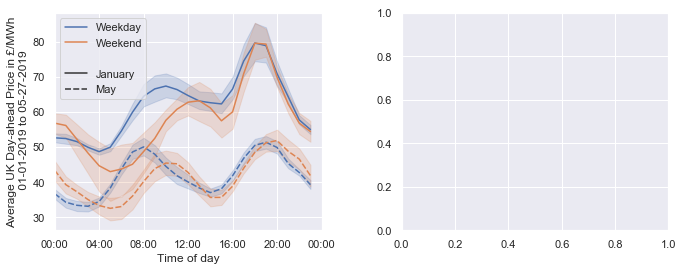

In [630]:
# Plot the responses for different events and regions
fig,axes=plt.subplots(1,2,figsize=(11,4))
plt.subplots_adjust(wspace=0.3)
ax=axes[0]
sns.lineplot(x=time, y=price,
             hue=label, 
             style=style,
             data=rf[rf[style]!='Other'],
             ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.set_xlim(0,24*60*60)
ax.set_xticks(range(0,24*60*60+1,4*60*60))

In [631]:
fs=['Carbon_Intensity_Data.csv','Carbon_Intensity_Data (1).csv','Carbon_Intensity_Data (2).csv',
   'Carbon_Intensity_Data (3).csv','Carbon_Intensity_Data (4).csv']
wfs=[]
for f in fs:
    wfs.append(pd.read_csv(f))
wf=pd.concat(wfs)
wf['ts']=pd.to_datetime(wf['Datetime (UTC)'])
wf=wf.set_index('ts',drop=False).sort_index()
carbon='UK Electricity Carbon Intensity in gCO2/kWh\n 01-01-2019 to 05-27-2019'
wf[carbon]=wf['Actual Carbon Intensity (gCO2/kWh)'].astype(float)
wf[price]=wf[carbon].rolling(3).mean()
wf['day']=wf['ts'].dt.weekday_name
wf[time]=wf['ts'].dt.time
wf['Month']=wf['ts'].dt.month
wf['date']=wf['ts'].dt.date.astype(str)

In [632]:
label='Day type'
style=' '
labels=[]
styles=[]
pretty={1:'January',5:'May'}
for i in wf[['date','day','Month']].values:
    if i[1] in ['Saturday','Sunday']:
        d='Weekend'
    else:
        d='Weekday'
    if i[2] in [1,5]:
        s=pretty[i[2]]
    else:
        s='Other'
    labels.append(d)
    styles.append(s)
wf[label]=labels
wf[style]=styles

In [633]:
# Plot the responses for different events and regions
ax=axes[1]
sns.lineplot(x=time, y=carbon,
             hue=label, 
             style=style,
             data=wf[wf[style]!='Other'],
             legend=False,
             ax=ax)
ax.set_xlim(0,24*60*60)
ax.set_xticks(range(0,24*60*60+1,4*60*60))
fig.savefig('b.png',bbox_inches='tight',dpi=200)

In [634]:
wz=wf.groupby('Day type').mean()[[carbon]]

In [635]:
1-wz.loc['Weekend']/wz.loc['Weekday']

UK Electricity Carbon Intensity in gCO2/kWh\n 01-01-2019 to 05-27-2019    0.175075
dtype: float64

In [636]:
wz=wf[wf['Month']==1].groupby('Day type').mean()[[carbon]]
1-wz.loc['Weekend']/wz.loc['Weekday']

UK Electricity Carbon Intensity in gCO2/kWh\n 01-01-2019 to 05-27-2019    0.18281
dtype: float64

In [637]:
wz=wf[wf['Month']==5].groupby('Day type').mean()[[carbon]]
1-wz.loc['Weekend']/wz.loc['Weekday']

UK Electricity Carbon Intensity in gCO2/kWh\n 01-01-2019 to 05-27-2019    0.141543
dtype: float64